# DATASET 1
## Dataset 1: online_gaming_behavior_dataset.csv
### Mục đích sử dụng:
Đây là bộ dữ liệu gốc và đầy đủ, được sử dụng làm tập huấn luyện chính để:
Khám phá hành vi chơi game trực tuyến
Phân tích mối quan hệ giữa các yếu tố như giới tính, thời gian chơi, thể loại game,...
Huấn luyện mô hình học máy để dự đoán mức độ gắn bó (engagement)
### Cách xử lý:
Kiểm tra và xử lý missing values bằng:
+ median cho biến số
+ mode cho biến phân loại
Mã hóa các biến phân loại bằng LabelEncoder
Chia tập train/test theo tỉ lệ 80/20 và huấn luyện mô hình Random Forest

# Project 10: Predict Online Gaming Behavior

## Objective
Exploring patterns in online gaming behavior, developing machine learning models for player engagement prediction, and conducting research in gaming analytics.

## Todo works:
- Predictive modeling of player retention and engagement patterns
- Analysis of factors influencing player behavior and game performance  
- Optimization of game design, marketing strategies, and player experience enhancements

## Dataset
Using the online gaming behavior dataset from Kaggle to analyze and predict player engagement levels.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")


In [2]:
# Load the dataset
df = pd.read_csv('Dataset/online_gaming_behavior_dataset.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst few rows:")
df.head()


Dataset Shape: (40034, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: f

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [3]:
# Statistical summary
print("Statistical Summary:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique values in categorical columns:")
categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}: {df[col].unique()}")
        print(f"Value counts for {col}:")
        print(df[col].value_counts())


Statistical Summary:
           PlayerID           Age  PlayTimeHours  InGamePurchases  \
count  40034.000000  40034.000000   40034.000000     40034.000000   
mean   29016.500000     31.992531      12.024365         0.200854   
std    11556.964675     10.043227       6.914638         0.400644   
min     9000.000000     15.000000       0.000115         0.000000   
25%    19008.250000     23.000000       6.067501         0.000000   
50%    29016.500000     32.000000      12.008002         0.000000   
75%    39024.750000     41.000000      17.963831         0.000000   
max    49033.000000     49.000000      23.999592         1.000000   

       SessionsPerWeek  AvgSessionDurationMinutes   PlayerLevel  \
count     40034.000000               40034.000000  40034.000000   
mean          9.471774                  94.792252     49.655568   
std           5.763667                  49.011375     28.588379   
min           0.000000                  10.000000      1.000000   
25%           4.000000

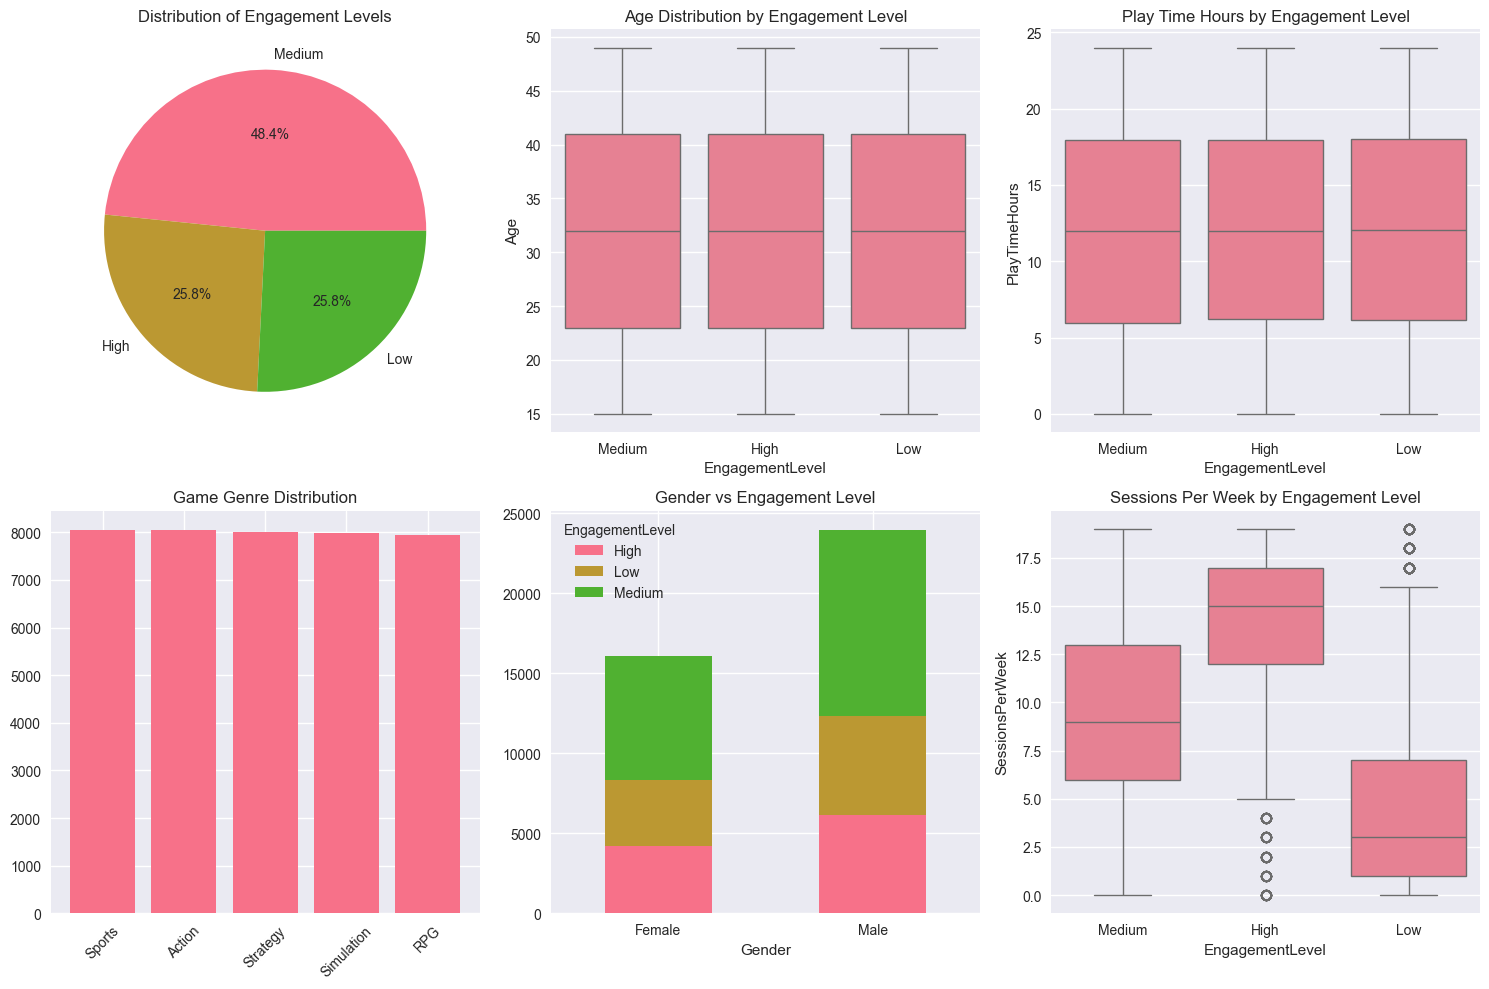

In [4]:
# Distribution of Engagement Level (Target Variable)
plt.figure(figsize=(15, 10))

# Engagement Level Distribution
plt.subplot(2, 3, 1)
engagement_counts = df['EngagementLevel'].value_counts()
plt.pie(engagement_counts.values, labels=engagement_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Engagement Levels')

# Age Distribution by Engagement Level
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='EngagementLevel', y='Age')
plt.title('Age Distribution by Engagement Level')

# Play Time Hours by Engagement Level
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='EngagementLevel', y='PlayTimeHours')
plt.title('Play Time Hours by Engagement Level')

# Game Genre Distribution
plt.subplot(2, 3 , 4)
genre_counts = df
-ôpiut['GameGenre'].value_counts()
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Game Genre Distribution')
plt.xticks(rotation=45)

# Gender vs Engagement Level
plt.subplot(2, 3, 5)
gender_engagement = pd.crosstab(df['Gender'], df['EngagementLevel'])
gender_engagement.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Gender vs Engagement Level')
plt.xticks(rotation=0)

# Sessions Per Week by Engagement Level
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='EngagementLevel', y='SessionsPerWeek')
plt.title('Sessions Per Week by Engagement Level')

plt.tight_layout()
plt.show()


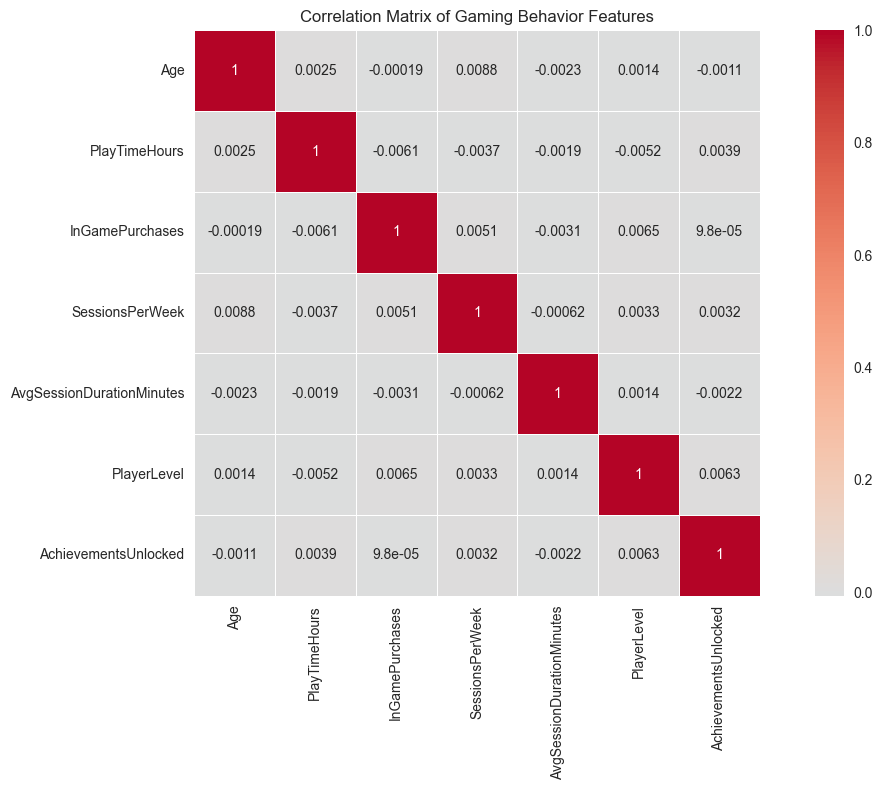

Strong correlations (|r| > 0.5):


In [5]:
# Correlation Analysis
plt.figure(figsize=(12, 8))

# Select numerical columns for correlation
numerical_cols = ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 
                  'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

# Create correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Gaming Behavior Features')
plt.tight_layout()
plt.show()

# Additional insights
print("Strong correlations (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")


In [6]:
# Create a copy of the dataset for preprocessing
df_processed = df.copy()

# Remove PlayerID as it's just an identifier
df_processed = df_processed.drop('PlayerID', axis=1)

# Label encode categorical variables
label_encoders = {}
categorical_features = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']

for feature in categorical_features:
    le = LabelEncoder()
    df_processed[feature + '_encoded'] = le.fit_transform(df_processed[feature])
    label_encoders[feature] = le
    print(f"{feature} encoding mapping:")
    for i, label in enumerate(le.classes_):
        print(f"  {label}: {i}")
    print()

# Encode target variable (EngagementLevel)
target_encoder = LabelEncoder()
df_processed['EngagementLevel_encoded'] = target_encoder.fit_transform(df_processed['EngagementLevel'])

print("Target variable encoding:")
for i, label in enumerate(target_encoder.classes_):
    print(f"  {label}: {i}")

# Select features for modeling
feature_columns = (['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 
                   'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'] + 
                  [f + '_encoded' for f in categorical_features])

X = df_processed[feature_columns]
y = df_processed['EngagementLevel_encoded']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures used: {feature_columns}")


Gender encoding mapping:
  Female: 0
  Male: 1

Location encoding mapping:
  Asia: 0
  Europe: 1
  Other: 2
  USA: 3

GameGenre encoding mapping:
  Action: 0
  RPG: 1
  Simulation: 2
  Sports: 3
  Strategy: 4

GameDifficulty encoding mapping:
  Easy: 0
  Hard: 1
  Medium: 2

Target variable encoding:
  High: 0
  Low: 1
  Medium: 2

Feature matrix shape: (40034, 11)
Target vector shape: (40034,)

Features used: ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked', 'Gender_encoded', 'Location_encoded', 'GameGenre_encoded', 'GameDifficulty_encoded']


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target distribution:")
print(pd.Series(y_train).value_counts().sort_index())
print(f"\nTesting target distribution:")
print(pd.Series(y_test).value_counts().sort_index())


Training set shape: (32027, 11)
Testing set shape: (8007, 11)
Training target distribution:
EngagementLevel_encoded
0     8269
1     8259
2    15499
Name: count, dtype: int64

Testing target distribution:
EngagementLevel_encoded
0    2067
1    2065
2    3875
Name: count, dtype: int64


In [8]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1
)

# Train the model
print("Training Random Forest Classifier...")
rf_classifier.fit(X_train, y_train)
print("Training completed!")

# Make predictions
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Cross-validation score
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Training Random Forest Classifier...
Training completed!

Model Accuracy: 0.9098
Cross-validation scores: [0.91617234 0.90399625 0.91288056 0.90913349 0.91147541]
Mean CV score: 0.9107 (+/- 0.0081)


Classification Report:
              precision    recall  f1-score   support

        High       0.92      0.87      0.89      2067
         Low       0.91      0.88      0.89      2065
      Medium       0.91      0.95      0.93      3875

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007



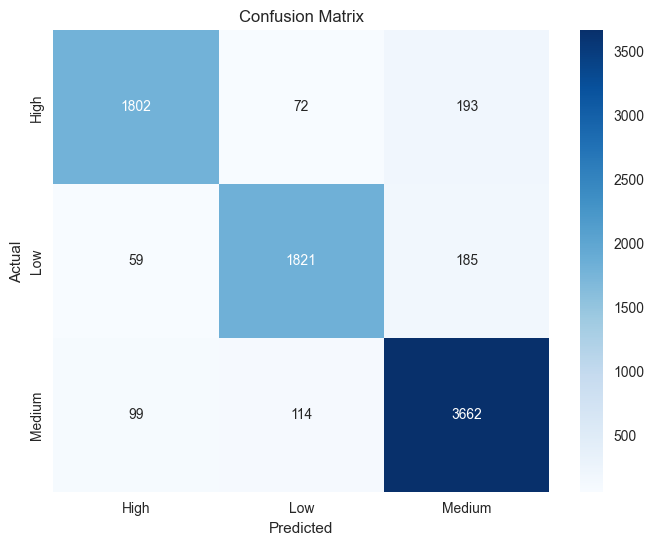

In [9]:
# Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_encoder.classes_, 
            yticklabels=target_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Feature Importance Ranking:
                      feature  importance
3             SessionsPerWeek    0.419871
4   AvgSessionDurationMinutes    0.310380
1               PlayTimeHours    0.057187
5                 PlayerLevel    0.056206
6        AchievementsUnlocked    0.051251
0                         Age    0.041923
9           GameGenre_encoded    0.020020
8            Location_encoded    0.015778
10     GameDifficulty_encoded    0.012719
7              Gender_encoded    0.008067
2             InGamePurchases    0.006598


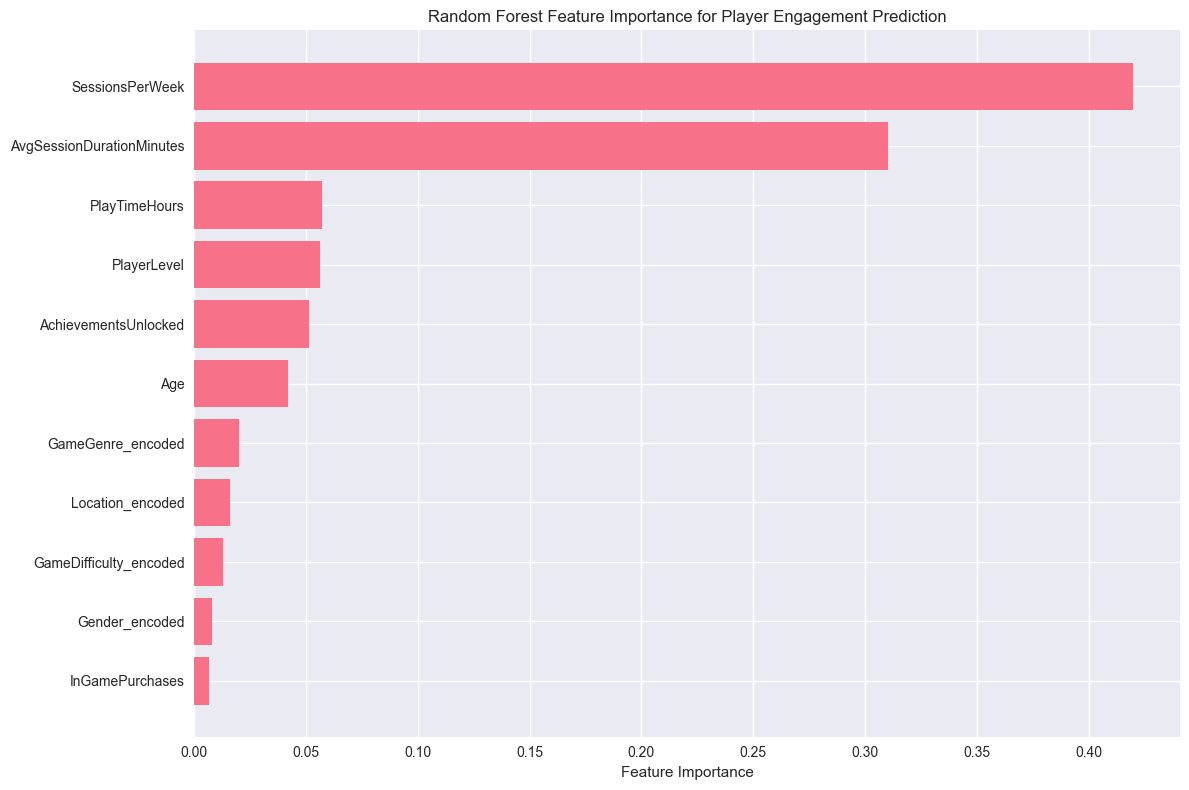


Top 5 Most Important Features:
1. SessionsPerWeek: 0.4199
2. AvgSessionDurationMinutes: 0.3104
3. PlayTimeHours: 0.0572
4. PlayerLevel: 0.0562
5. AchievementsUnlocked: 0.0513


In [10]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance Ranking:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance for Player Engagement Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Top 5 most important features
print(f"\nTop 5 Most Important Features:")
for i, (feature, importance) in enumerate(feature_importance.head().values, 1):
    print(f"{i}. {feature}: {importance:.4f}")


In [11]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross-Validation
print("Performing hyperparameter tuning...")
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,  # Using 3-fold CV to reduce computation time
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train the best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Improved model accuracy: {accuracy_best:.4f}")
print(f"Improvement: {accuracy_best - accuracy:.4f}")


Performing hyperparameter tuning...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.9109
Improved model accuracy: 0.9092
Improvement: -0.0006


In [12]:
# Advanced Analytics for Gaming Insights

# 1. Player Segmentation Analysis
print("=== PLAYER SEGMENTATION ANALYSIS ===")
segmentation = df.groupby(['EngagementLevel', 'GameGenre']).agg({
    'Age': 'mean',
    'PlayTimeHours': 'mean',
    'SessionsPerWeek': 'mean',
    'PlayerLevel': 'mean',
    'InGamePurchases': 'sum'
}).round(2)

print("Player characteristics by engagement level and game genre:")
print(segmentation)

# 2. Engagement Pattern Analysis
print("\n=== ENGAGEMENT PATTERN ANALYSIS ===")
high_engagement = df[df['EngagementLevel'] == 'High']
medium_engagement = df[df['EngagementLevel'] == 'Medium']
low_engagement = df[df['EngagementLevel'] == 'Low']

print(f"High Engagement Players ({len(high_engagement)} players):")
print(f"  - Average Play Time: {high_engagement['PlayTimeHours'].mean():.2f} hours")
print(f"  - Average Sessions/Week: {high_engagement['SessionsPerWeek'].mean():.2f}")
print(f"  - Average Player Level: {high_engagement['PlayerLevel'].mean():.2f}")
print(f"  - In-Game Purchase Rate: {(high_engagement['InGamePurchases'].sum() / len(high_engagement) * 100):.1f}%")

print(f"\nMedium Engagement Players ({len(medium_engagement)} players):")
print(f"  - Average Play Time: {medium_engagement['PlayTimeHours'].mean():.2f} hours")
print(f"  - Average Sessions/Week: {medium_engagement['SessionsPerWeek'].mean():.2f}")
print(f"  - Average Player Level: {medium_engagement['PlayerLevel'].mean():.2f}")
print(f"  - In-Game Purchase Rate: {(medium_engagement['InGamePurchases'].sum() / len(medium_engagement) * 100):.1f}%")

print(f"\nLow Engagement Players ({len(low_engagement)} players):")
print(f"  - Average Play Time: {low_engagement['PlayTimeHours'].mean():.2f} hours")
print(f"  - Average Sessions/Week: {low_engagement['SessionsPerWeek'].mean():.2f}")
print(f"  - Average Player Level: {low_engagement['PlayerLevel'].mean():.2f}")
print(f"  - In-Game Purchase Rate: {(low_engagement['InGamePurchases'].sum() / len(low_engagement) * 100):.1f}%")


=== PLAYER SEGMENTATION ANALYSIS ===
Player characteristics by engagement level and game genre:
                              Age  PlayTimeHours  SessionsPerWeek  \
EngagementLevel GameGenre                                           
High            Action      32.22          12.17            14.16   
                RPG         31.76          11.75            14.30   
                Simulation  31.81          11.84            14.20   
                Sports      32.15          12.26            14.29   
                Strategy    31.67          12.31            14.32   
Low             Action      31.69          12.35             4.55   
                RPG         31.73          12.17             4.45   
                Simulation  32.08          12.05             4.49   
                Sports      31.95          12.11             4.62   
                Strategy    32.04          11.83             4.54   
Medium          Action      31.95          12.06             9.59   
       

In [13]:
# 3. Business Recommendations Based on Model Insights
print("\n=== BUSINESS RECOMMENDATIONS ===")

# Based on feature importance analysis
top_features = feature_importance.head(3)['feature'].tolist()
print("Based on our Random Forest analysis, the top factors affecting player engagement are:")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")

print("\n--- STRATEGIC RECOMMENDATIONS ---")

print("\n1. PLAYER RETENTION STRATEGIES:")
print("   • Focus on increasing sessions per week for medium/low engagement players")
print("   • Develop achievement systems to boost player progression")
print("   • Create personalized content based on play time patterns")

print("\n2. GAME DESIGN OPTIMIZATION:")
print("   • Balance game difficulty to maintain engagement across all skill levels")
print("   • Design genre-specific engagement mechanics")
print("   • Implement adaptive session duration recommendations")

print("\n3. MONETIZATION STRATEGIES:")
print("   • Target high-engagement players with premium content")
print("   • Create value propositions for medium-engagement players")
print("   • Design re-engagement campaigns for low-engagement segments")

print("\n4. MARKETING STRATEGIES:")
print("   • Segment campaigns by engagement level and game genre")
print("   • Focus acquisition on demographics showing high engagement patterns")
print("   • Develop retention campaigns for at-risk player segments")

# Risk Analysis
print("\n--- PLAYER CHURN RISK ANALYSIS ---")
risk_indicators = df[(df['SessionsPerWeek'] < 3) & (df['PlayTimeHours'] < 10)]
print(f"Players at high churn risk: {len(risk_indicators)} ({len(risk_indicators)/len(df)*100:.1f}% of total)")
print("Characteristics of at-risk players:")
print(risk_indicators.groupby('GameGenre')['EngagementLevel'].value_counts())



=== BUSINESS RECOMMENDATIONS ===
Based on our Random Forest analysis, the top factors affecting player engagement are:
1. SessionsPerWeek
2. AvgSessionDurationMinutes
3. PlayTimeHours

--- STRATEGIC RECOMMENDATIONS ---

1. PLAYER RETENTION STRATEGIES:
   • Focus on increasing sessions per week for medium/low engagement players
   • Develop achievement systems to boost player progression
   • Create personalized content based on play time patterns

2. GAME DESIGN OPTIMIZATION:
   • Balance game difficulty to maintain engagement across all skill levels
   • Design genre-specific engagement mechanics
   • Implement adaptive session duration recommendations

3. MONETIZATION STRATEGIES:
   • Target high-engagement players with premium content
   • Create value propositions for medium-engagement players
   • Design re-engagement campaigns for low-engagement segments

4. MARKETING STRATEGIES:
   • Segment campaigns by engagement level and game genre
   • Focus acquisition on demographics sho

In [14]:
def predict_player_engagement(age, play_time_hours, in_game_purchases, sessions_per_week,
                               avg_session_duration, player_level, achievements_unlocked,
                               gender, location, game_genre, game_difficulty):
    """
    Predict player engagement level based on gaming behavior characteristics.
    
    Parameters:
    - age: Player's age
    - play_time_hours: Total hours played
    - in_game_purchases: Number of in-game purchases (0 or 1)
    - sessions_per_week: Average sessions per week
    - avg_session_duration: Average session duration in minutes
    - player_level: Current player level
    - achievements_unlocked: Number of achievements unlocked
    - gender: 'Male' or 'Female'
    - location: 'Asia', 'Europe', 'USA', or 'Other'
    - game_genre: 'Action', 'RPG', 'Simulation', 'Sports', or 'Strategy'
    - game_difficulty: 'Easy', 'Medium', or 'Hard'
    
    Returns:
    - Predicted engagement level and probability
    """
    
    # Encode categorical variables
    gender_encoded = label_encoders['Gender'].transform([gender])[0]
    location_encoded = label_encoders['Location'].transform([location])[0]
    genre_encoded = label_encoders['GameGenre'].transform([game_genre])[0]
    difficulty_encoded = label_encoders['GameDifficulty'].transform([game_difficulty])[0]
    
    # Create feature vector
    features = np.array([[age, play_time_hours, in_game_purchases, sessions_per_week,
                         avg_session_duration, player_level, achievements_unlocked,
                         gender_encoded, location_encoded, genre_encoded, difficulty_encoded]])
    
    # Make prediction
    prediction = best_rf.predict(features)[0]
    probability = best_rf.predict_proba(features)[0]
    
    # Convert back to engagement level
    engagement_level = target_encoder.inverse_transform([prediction])[0]
    
    return {
        'predicted_engagement': engagement_level,
        'probabilities': {
            'High': probability[0],
            'Low': probability[1], 
            'Medium': probability[2]
        }
    }

# Example prediction
print("=== EXAMPLE PREDICTION ===")
example_prediction = predict_player_engagement(
    age=25,
    play_time_hours=15.5,
    in_game_purchases=1,
    sessions_per_week=8,
    avg_session_duration=120,
    player_level=45,
    achievements_unlocked=30,
    gender='Male',
    location='USA',
    game_genre='Action',
    game_difficulty='Medium'
)

print(f"Predicted Engagement Level: {example_prediction['predicted_engagement']}")
print("Engagement Probabilities:")
for level, prob in example_prediction['probabilities'].items():
    print(f"  {level}: {prob:.3f}")


=== EXAMPLE PREDICTION ===
Predicted Engagement Level: Medium
Engagement Probabilities:
  High: 0.096
  Low: 0.072
  Medium: 0.832


# DATASET 2
## Dataset 2: online_gaming_behavior_dirty_200.csv
### Mục đích sử dụng:
Đây là tập dữ liệu giả lập tình huống thực tế, chứa nhiều lỗi phổ biến như:
Thiếu dữ liệu (missing values)
Mất cân bằng nhãn
Nhiễu hoặc định dạng chưa chuẩn
Dataset này được dùng để:
- Kiểm tra độ bền và khả năng tổng quát hóa của mô hình
- Đánh giá quy trình làm sạch và dự đoán có thể áp dụng trong điều kiện thực tế không hoàn hảo
- So sánh kết quả mô hình giữa dữ liệu sạch và dữ liệu bẩn
### Cách xử lý:
- Làm sạch tương tự như dataset 1 (median/mode + LabelEncoder)
- Dự đoán bằng mô hình đã huấn luyện từ dataset 1 (không retrain)
- Đánh giá hiệu suất qua các chỉ số: precision, recall, f1-score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file
df = pd.read_csv("Dataset/online_gaming_behavior_dirty_200.csv")

# Hiển thị kích thước & 5 dòng đầu
print("Shape:", df.shape)
df.head()

Shape: (200, 13)


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,male,Asia,Action,21.5,2,easy,18a,74,29,34,HIGH
1,9001,NaN,Male,NaN,Action,-17.66,104,Easy,5,30,19,18,Medium
2,9002,67,FEMALE,VN,NaN,37.05,3,HARD,8,110,24,11,Medium
3,9003,61,male,Other,Adventure,29.68,1005,Easy,9,125,93,49,MEDIUM
4,9004,61,FEMALE,Other,Puzzle,118.59,2,Unknown,14,378,31a,18,Low


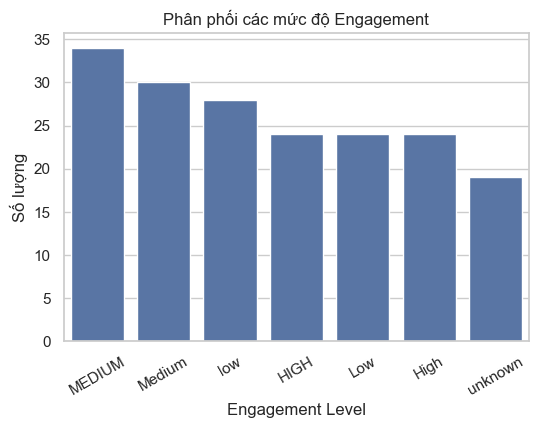

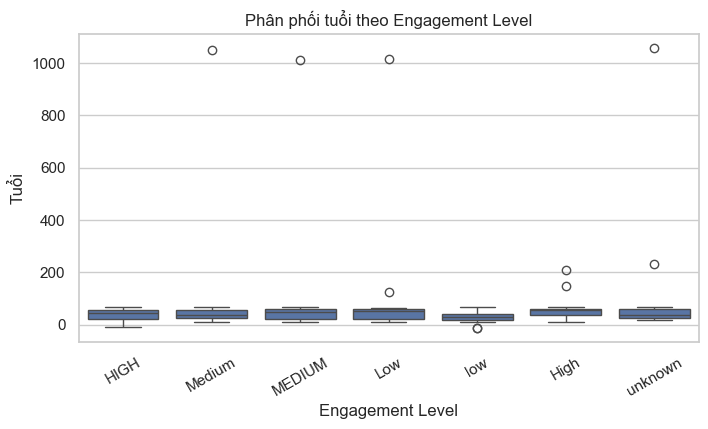

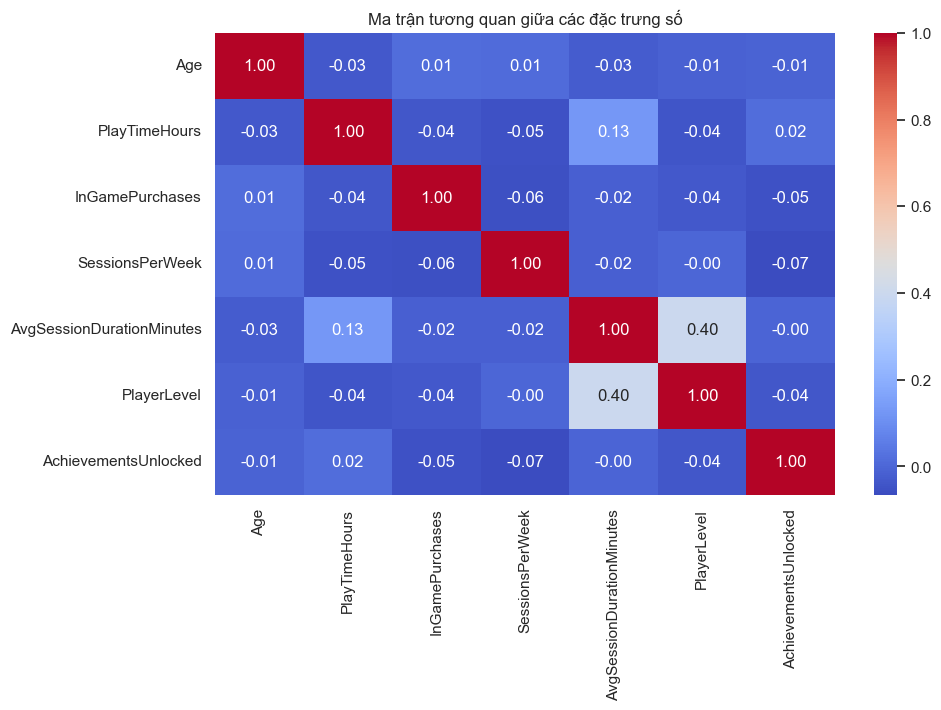

In [2]:
# Cài đặt hiển thị
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# 👁️ 1. Phân phối của biến mục tiêu: EngagementLevel
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='EngagementLevel', order=df['EngagementLevel'].value_counts().index)
plt.title("Phân phối các mức độ Engagement")
plt.xlabel("Engagement Level")
plt.ylabel("Số lượng")
plt.xticks(rotation=30)
plt.show()

# 👁️ 2. Boxplot: Age theo EngagementLevel
df_plot = df[['EngagementLevel', 'Age']].copy()
df_plot['Age'] = pd.to_numeric(df_plot['Age'], errors='coerce')
df_plot = df_plot.dropna()

plt.figure(figsize=(8, 4))
sns.boxplot(data=df_plot, x='EngagementLevel', y='Age')
plt.title("Phân phối tuổi theo Engagement Level")
plt.xlabel("Engagement Level")
plt.ylabel("Tuổi")
plt.xticks(rotation=30)
plt.show()

# 👁️ 3. Tương quan giữa các đặc trưng số
num_cols = ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek',
            'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

# Ép kiểu số để tránh lỗi
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Vẽ heatmap tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa các đặc trưng số")
plt.show()

In [5]:
# 👣 Làm sạch cột Age
def clean_age(val):
    try:
        val = str(val).strip().lower()
        if val == 'mười': return 10
        if val.endswith('a'): return int(val[:-1])  # ví dụ: "22a" → 22
        val = int(val)
        if val < 5 or val > 100: return np.nan      # loại bỏ giá trị không hợp lý
        return val
    except:
        return np.nan

df['Age'] = df['Age'].apply(clean_age)

# 👣 Danh sách cột số cần ép kiểu
numeric_cols = ['PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek',
                'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # lỗi sẽ trở thành NaN

# 👣 Chuẩn hóa văn bản cho các cột phân loại
df['Gender'] = df['Gender'].astype(str).str.strip().str.capitalize()
df['GameGenre'] = df['GameGenre'].astype(str).str.strip().str.capitalize()
df['GameDifficulty'] = df['GameDifficulty'].astype(str).str.strip().str.capitalize()
df['EngagementLevel'] = df['EngagementLevel'].astype(str).str.strip().str.capitalize()

# 👣 Điền missing values

# Cột số → điền median
df['Age'] = df['Age'].fillna(df['Age'].median())
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Cột phân loại → điền mode
categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 👣 Nếu còn cột không cần thiết, bạn có thể xóa (tuỳ chọn)
if 'PlayerID' in df.columns:
    df = df.drop(columns=['PlayerID'])

# 👣 Kiểm tra lại sau xử lý
print("✅ Sau làm sạch:")
print(df.info())
print("Số dòng còn NaN:", df.isnull().sum().sum())


✅ Sau làm sạch:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        0 non-null      float64
 1   Gender                     200 non-null    object 
 2   Location                   200 non-null    object 
 3   GameGenre                  200 non-null    object 
 4   PlayTimeHours              200 non-null    float64
 5   InGamePurchases            200 non-null    float64
 6   GameDifficulty             200 non-null    object 
 7   SessionsPerWeek            200 non-null    float64
 8   AvgSessionDurationMinutes  200 non-null    float64
 9   PlayerLevel                200 non-null    float64
 10  AchievementsUnlocked       200 non-null    float64
 11  EngagementLevel            200 non-null    object 
dtypes: float64(7), object(5)
memory usage: 18.9+ KB
None
Số dòng còn NaN: 200


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# 👣 1. Encode các cột phân loại
label_encoders = {}
categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 👣 2. Encode biến mục tiêu (EngagementLevel)
target_le = LabelEncoder()
df['EngagementLevel'] = target_le.fit_transform(df['EngagementLevel'])

# 👣 3. Tách X và y
X = df.drop('EngagementLevel', axis=1)
y = df['EngagementLevel']

# 👣 4. Xử lý NaN, inf & loại dòng bất thường

# Bắt buộc kiểu số
X = X.apply(pd.to_numeric, errors='coerce')

# Thay thế inf bằng NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Xóa các cột có phương sai = 0 (gây chia 0 trong scaler)
X = X.loc[:, X.std(skipna=True) > 0]

# In thông tin kỹ
print("🔍 Trước khi xử lý: NaN =", X.isnull().sum().sum(), "| Inf =", np.isinf(X.values).sum())

# Loại hoàn toàn dòng còn NaN
valid_rows = X.dropna().index
X = X.loc[valid_rows]
y = y.loc[valid_rows]

# Kiểm tra lần cuối
print("✅ Sau xử lý: X.shape =", X.shape, "| NaN =", X.isnull().sum().sum())

# 👣 5. Chuẩn hóa an toàn
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 👣 6. Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("🎯 Dữ liệu đã sẵn sàng để huấn luyện. Train size:", X_train.shape[0], "Test size:", X_test.shape[0])

🔍 Trước khi xử lý: NaN = 0 | Inf = 0
✅ Sau xử lý: X.shape = (200, 10) | NaN = 0
🎯 Dữ liệu đã sẵn sàng để huấn luyện. Train size: 160 Test size: 40


🎯 Accuracy: 47.50%

📋 Classification Report:
              precision    recall  f1-score   support

        High       0.33      0.40      0.36        10
         Low       0.64      0.54      0.58        13
      Medium       0.50      0.64      0.56        11
         Nan       0.00      0.00      0.00         4
     Unknown       1.00      0.50      0.67         2

    accuracy                           0.47        40
   macro avg       0.49      0.41      0.43        40
weighted avg       0.48      0.47      0.47        40



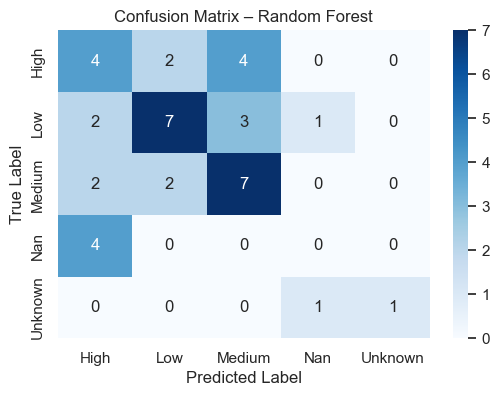

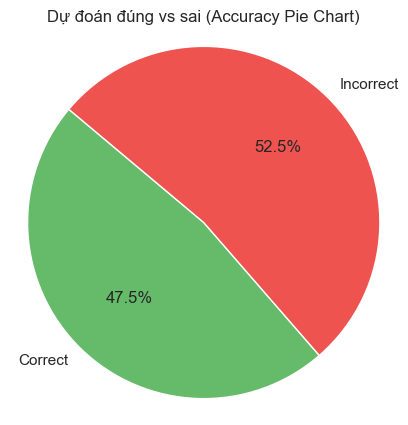

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 👣 1. Huấn luyện mô hình
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# 👣 2. Dự đoán
y_pred = model.predict(X_test)

# 👣 3. Tên các lớp mục tiêu (chuyển sang chuỗi)
class_labels = [str(label) for label in target_le.classes_]

# 👣 4. Đánh giá hiệu suất
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {acc:.2%}\n")

print("📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_labels, zero_division=0))

# 👣 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 👣 6. Trực quan hóa Accuracy vs Error
labels = ['Correct', 'Incorrect']
values = [sum(y_pred == y_test), sum(y_pred != y_test)]
colors = ['#66BB6A', '#EF5350']

plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Dự đoán đúng vs sai (Accuracy Pie Chart)")
plt.axis('equal')
plt.show()


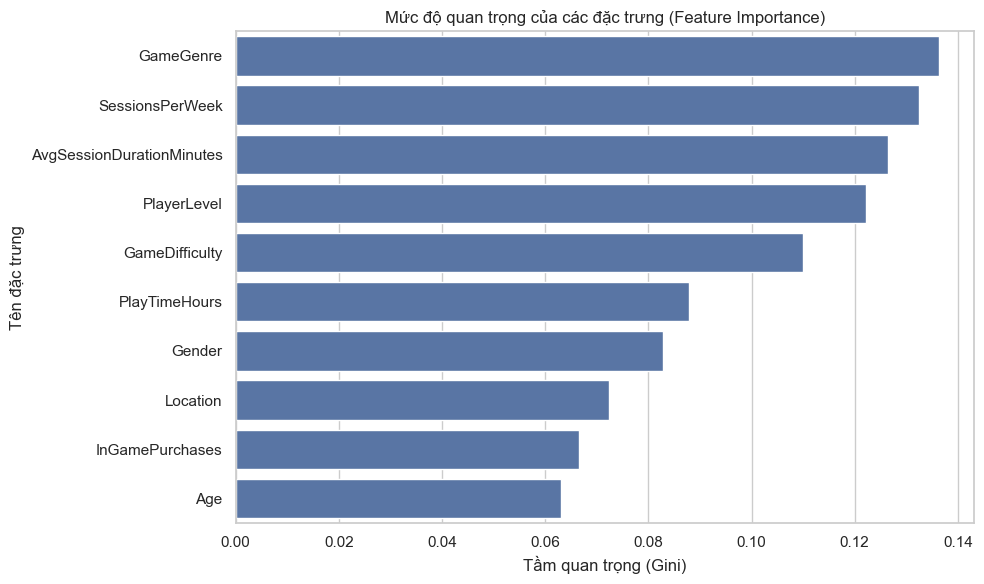

In [11]:
# 👣 1. Lấy độ quan trọng của các đặc trưng
importances = model.feature_importances_

# 👣 2. Tên các đặc trưng
feature_names = df.drop(columns=['EngagementLevel']).columns

# 👣 3. Sắp xếp theo độ quan trọng giảm dần
indices = np.argsort(importances)[::-1]

# 👣 4. Trực quan hóa Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Mức độ quan trọng của các đặc trưng (Feature Importance)")
plt.xlabel("Tầm quan trọng (Gini)")
plt.ylabel("Tên đặc trưng")
plt.tight_layout()
plt.show()

🎯 Retention Accuracy: 1.0
              precision    recall  f1-score   support

Not Retained       1.00      1.00      1.00         7
    Retained       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



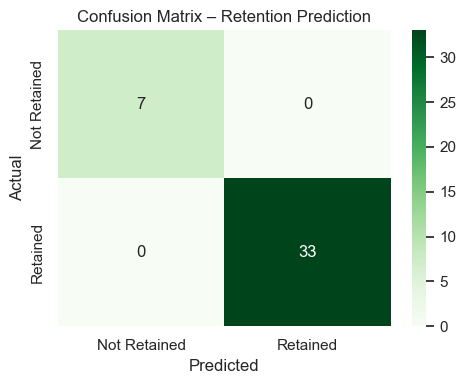

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 1. Tạo nhãn Retention
df_retention = df.copy()
df_retention['Retained'] = ((df_retention['SessionsPerWeek'] >= 10) | 
                             (df_retention['PlayTimeHours'] >= 20)).astype(int)

# 🔁 2. X và y cho bài toán retention
X_ret = df_retention.drop(columns=['EngagementLevel', 'Retained'])
y_ret = df_retention['Retained']

# 🧼 3. Làm sạch: ép kiểu, xử lý NaN, loại Inf
X_ret = X_ret.apply(pd.to_numeric, errors='coerce')
X_ret = X_ret.replace([np.inf, -np.inf], np.nan)
X_ret = X_ret.fillna(X_ret.median(numeric_only=True))

# 🧪 4. Loại bỏ các cột có phương sai = 0 (toàn 1 giá trị gây lỗi chia 0)
stds = X_ret.std(numeric_only=True)
cols_to_keep = stds[stds > 0].index
X_ret = X_ret[cols_to_keep]

# 🔄 5. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_ret_scaled = scaler.fit_transform(X_ret)

# 📦 6. Tách tập huấn luyện và kiểm thử
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_ret_scaled, y_ret, test_size=0.2, random_state=42)

# 🤖 7. Huấn luyện mô hình
rf_ret = RandomForestClassifier(random_state=42)
rf_ret.fit(Xr_train, yr_train)
yr_pred = rf_ret.predict(Xr_test)

# 📊 8. Đánh giá mô hình
print("🎯 Retention Accuracy:", accuracy_score(yr_test, yr_pred))
print(classification_report(yr_test, yr_pred, target_names=["Not Retained", "Retained"], zero_division=0))

# 📈 9. Vẽ confusion matrix
cm = confusion_matrix(yr_test, yr_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=["Not Retained", "Retained"],
            yticklabels=["Not Retained", "Retained"])
plt.title("Confusion Matrix – Retention Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


📊 So sánh số lượng giá trị thiếu giữa 2 dataset:


,Dataset1_Missing,Dataset2_Missing
PlayerID,0,0
Age,0,5
Gender,0,29
Location,0,22
GameGenre,0,26
PlayTimeHours,0,4
InGamePurchases,0,12
GameDifficulty,0,38
SessionsPerWeek,0,5
AvgSessionDurationMinutes,0,6


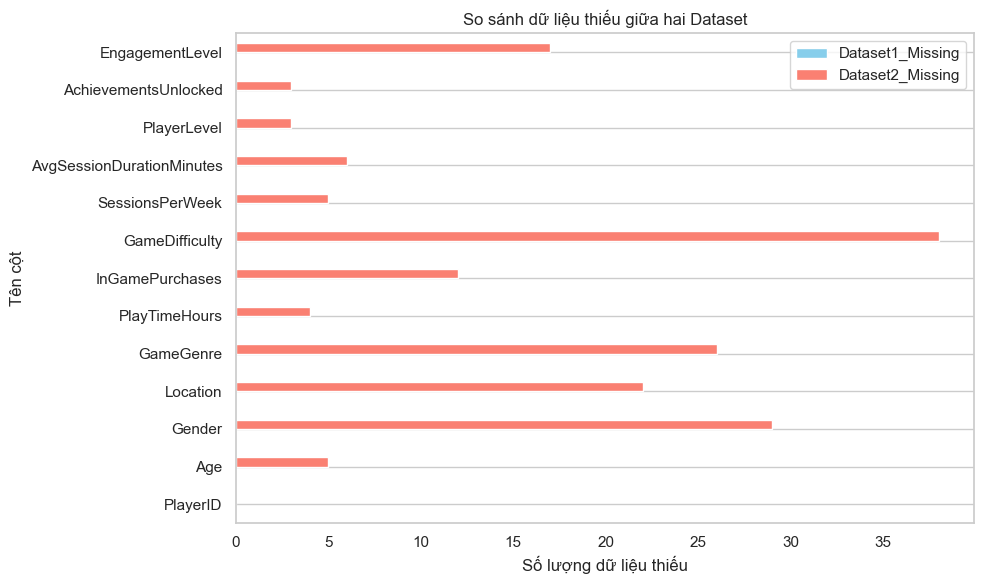

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dữ liệu
df1 = pd.read_csv("Dataset/online_gaming_behavior_dataset.csv")
df2 = pd.read_csv("Dataset/online_gaming_behavior_dirty_200.csv")

# So sánh dữ liệu thiếu
missing_df1 = df1.isnull().sum()
missing_df2 = df2.isnull().sum()

compare_missing = pd.DataFrame({
    "Dataset1_Missing": missing_df1,
    "Dataset2_Missing": missing_df2
})

print("📊 So sánh số lượng giá trị thiếu giữa 2 dataset:")
display(compare_missing)

compare_missing.plot(kind='barh', figsize=(10, 6), title='So sánh dữ liệu thiếu giữa hai Dataset', color=['skyblue', 'salmon'])
plt.xlabel("Số lượng dữ liệu thiếu")
plt.ylabel("Tên cột")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [29]:
# --- Handle Missing Values ---
print("Missing values before handling:")
print(df.isnull().sum())

# Simple strategy: fill numeric with median, categorical with mode
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].median())     # với số
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after handling:")
print(df.isnull().sum())

# --- Export Cleaned Data ---
df.to_csv("Dataset/cleaned_data.csv", index=False)
print("Cleaned dataset exported to 'cleaned_data.csv'")

Missing values before handling:
Age                          200
Gender                         0
Location                       0
GameGenre                      0
PlayTimeHours                  0
InGamePurchases                0
GameDifficulty                 0
SessionsPerWeek                0
AvgSessionDurationMinutes      0
PlayerLevel                    0
AchievementsUnlocked           0
EngagementLevel                0
dtype: int64

Missing values after handling:
Age                          200
Gender                         0
Location                       0
GameGenre                      0
PlayTimeHours                  0
InGamePurchases                0
GameDifficulty                 0
SessionsPerWeek                0
AvgSessionDurationMinutes      0
PlayerLevel                    0
AchievementsUnlocked           0
EngagementLevel                0
dtype: int64
Cleaned dataset exported to 'cleaned_data.csv'


In [37]:
# Load cleaned dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Đọc dữ liệu đã làm sạch
df = pd.read_csv("Dataset/cleaned_data.csv")

# Mã hóa các biến phân loại (categorical)
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Tách đặc trưng (X) và nhãn mục tiêu (y)
X = df.drop("EngagementLevel", axis=1)
y = df["EngagementLevel"]

# Tách tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Huấn luyện mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
print("✅ Accuracy Score:", round(accuracy_score(y_test, y_pred), 4))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Kiểm tra lớp nào bị thiếu dự đoán
print("\n🔍 Nhãn thực tế trong tập test:", np.unique(y_test, return_counts=True))
print("🔍 Nhãn mà model đã dự đoán:", np.unique(y_pred, return_counts=True))


✅ Accuracy Score: 0.35

📊 Confusion Matrix:
[[5 3 2 0 0]
 [1 0 9 0 0]
 [1 3 8 1 0]
 [1 1 1 0 0]
 [3 0 0 0 1]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.00      0.00      0.00        10
           2       0.40      0.62      0.48        13
           3       0.00      0.00      0.00         3
           4       1.00      0.25      0.40         4

    accuracy                           0.35        40
   macro avg       0.37      0.27      0.27        40
weighted avg       0.34      0.35      0.32        40


🔍 Nhãn thực tế trong tập test: (array([0, 1, 2, 3, 4], dtype=int64), array([10, 10, 13,  3,  4], dtype=int64))
🔍 Nhãn mà model đã dự đoán: (array([0, 1, 2, 3, 4], dtype=int64), array([11,  7, 20,  1,  1], dtype=int64))


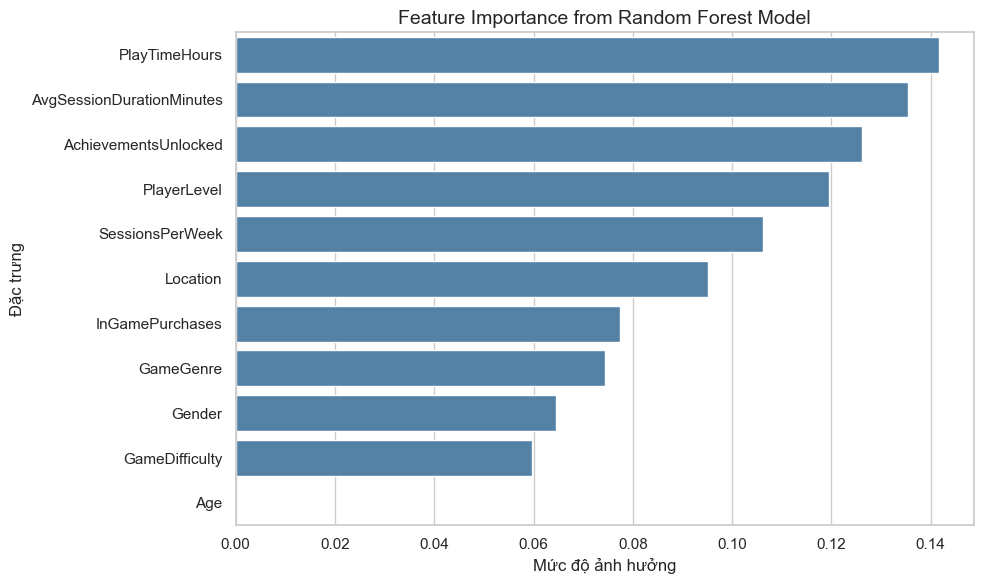

In [41]:
# Trực quan hóa độ quan trọng của các đặc trưng (feature importance)
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy độ quan trọng từ mô hình
importances = model.feature_importances_
feature_names = X.columns

# Tạo DataFrame để trực quan
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_df, color='steelblue')  # dùng color thay vì palette tránh warning
plt.title("Feature Importance from Random Forest Model", fontsize=14)
plt.xlabel("Mức độ ảnh hưởng", fontsize=12)
plt.ylabel("Đặc trưng", fontsize=12)
plt.tight_layout()
plt.show()
